In [166]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [167]:
data_1 = pd.read_csv("crop_production.csv")
data_2 = pd.read_excel("india_-_monthly_rainfall_data_-_1901_to_2002.xlsx")
data_3 = pd.read_excel("datafile (3).xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [168]:
data_1.reset_index(drop=True)
data_1.rename(columns = {"State_Name": "State","Crop_Year":"Year","District_Name":"District"},inplace=True)
data_1.head()

,State,District,Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [169]:
data_2.reset_index(drop=True)
data_2.dropna(inplace=True)
data_2['Year'] = data_2['Year'].astype(int)
data_2.drop(['vlookup'],axis=1,inplace=True)
data_2.head()

,State,District,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2,Andhra Pradesh,Adilabad,1901,6.725,10.488,23.288,35.560,23.119,115.546,294.119,276.865,181.615,47.310,1.339,0.000
3,Andhra Pradesh,Adilabad,1902,0.420,0.000,0.388,6.070,3.331,45.960,233.973,167.971,198.177,26.447,35.083,11.222
4,Andhra Pradesh,Adilabad,1903,6.643,1.956,0.173,4.551,33.348,132.078,436.611,334.544,226.037,138.818,14.095,8.823
5,Andhra Pradesh,Adilabad,1904,0.054,0.121,11.446,0.017,16.900,131.048,160.694,81.865,251.577,110.391,0.146,0.130
6,Andhra Pradesh,Adilabad,1905,0.589,2.293,8.252,35.020,17.569,79.937,96.331,313.522,361.697,4.950,0.146,0.000


In [170]:
data_3.reset_index(drop=True)
data_3.rename(columns = {"STATE": "State","Net Annual Ground Water Availability  (Ham)":"gnd_water_lvl"},inplace=True)
data_3 = data_3[['State','District','gnd_water_lvl']]
data_3.head()

,State,District,gnd_water_lvl
0,ANDHRA PRADESH,Srikakulam,111382.0
1,ANDHRA PRADESH,Vizianagaram,91598.0
2,ANDHRA PRADESH,Visakhapatnam,89454.0
3,ANDHRA PRADESH,East Godavari,153953.0
4,ANDHRA PRADESH,West Godavari,154366.0


In [171]:
data_1['State'] = data_1['State'].apply(lambda x: x.lower().split()[0])
data_2['State'] = data_2['State'].apply(lambda x: x.lower().split()[0])
data_3['State'] = data_3['State'].apply(lambda x: x.lower().split()[0])

In [172]:
data_1['District'] = data_1['District'].apply(lambda x: x.lower())
data_2['District'] = data_2['District'].apply(lambda x: x.lower())
data_3['District'] = data_3['District'].apply(lambda x: x.lower())

In [173]:
data = pd.merge(data_1,data_2,on=['State','Year','District'])

In [174]:
data = pd.merge(data,data_3,on=['State','District'])

In [175]:
data['Season'] = data['Season'].apply(lambda x: x.lower().strip())

In [176]:
for i in range(len(data)):
    if data['Season'][i] == 'kharif':
        data['Season'][i] = data['Jul'][i] + data['Aug'][i] + data['Sep'][i] + data['Oct'][i] 
        
    elif data['Season'][i] == 'rabi' or data['Season'][i] == 'winter' :
        data['Season'][i] = data['Oct'][i] + data['Nov'][i] + data['Dec'][i] + data['Jan'][i] + data['Feb'][i] + data['Mar'][i] 
    elif data['Season'][i] == 'summer':
        data['Season'][i] = data['Mar'][i] + data['Apr'][i] + data['May'][i] + data['Jun'][i]
    elif data['Season'][i] == 'autumn':
        data['Season'][i] = data['Sep'][i] + data['Oct'][i]
    else:
        data['Season'][i] = data['Jan'][i] + data['Feb'][i] + data['Mar'][i] + data['Apr'][i] + data['May'][i] + data['Jun'][i] +  data['Jul'][i] + data['Aug'][i] + data['Sep'][i] + data['Oct'][i] + data['Nov'][i] + data['Dec'][i] 

In [177]:
data.drop(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],axis=1,inplace=True)
data.dropna(inplace=True)

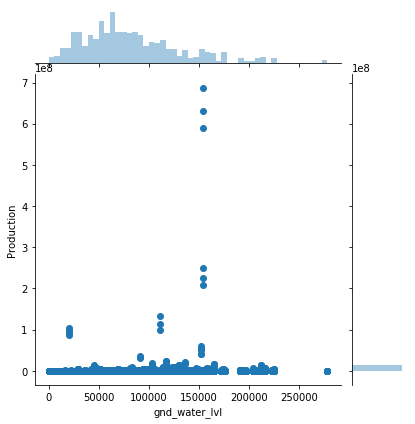

In [178]:
sns.jointplot(x='gnd_water_lvl',y='Production',data=data)

In [179]:
# data = data[data['State'] == 'andhra']

In [180]:
a = data['State']
b = data['District']
c = data['Crop']

In [181]:
a = pd.get_dummies(a)
b = pd.get_dummies(b)
c = pd.get_dummies(c)


In [182]:
cols_a = a.columns.tolist()
cols_a = cols_a[1:]
a = a[cols_a]
cols_b = b.columns.tolist()
cols_b = cols_b[1:]
b = b[cols_b]
cols_c = c.columns.tolist()
cols_c = cols_c[1:]
c = c[cols_c]
cols_d = c.columns.tolist()
cols_d = cols_d[1:]
c = c[cols_d]

In [183]:
data.drop(['State','District','Crop'],axis=1,inplace=True)
data.reset_index(drop=True,inplace=True)

In [184]:
data = pd.concat([data,a,b,c],axis = 1)

In [185]:
data

,Year,Season,Area,Production,gnd_water_lvl,arunachal,assam,bihar,haryana,himachal,...,Total foodgrain,Turmeric,Turnip,Urad,Varagu,Water Melon,Wheat,other fibres,other misc. pulses,other oilseeds
0,1997.0,487.023,21400.0,2600.0,149537.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1997.0,487.023,1400.0,500.0,149537.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1997.0,487.023,1000.0,100.0,149537.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1997.0,487.023,7300.0,9400.0,149537.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1997.0,487.023,3700.0,7100.0,149537.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44490,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44491,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44492,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44493,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
cols = data.columns.tolist()
cols = cols[:3]+ cols[4:] + [cols[3]]
data = data[cols]

In [187]:
data

,Year,Season,Area,gnd_water_lvl,arunachal,assam,bihar,haryana,himachal,jammu,...,Turmeric,Turnip,Urad,Varagu,Water Melon,Wheat,other fibres,other misc. pulses,other oilseeds,Production
0,1997.0,487.023,21400.0,149537.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600.0
1,1997.0,487.023,1400.0,149537.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0
2,1997.0,487.023,1000.0,149537.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
3,1997.0,487.023,7300.0,149537.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9400.0
4,1997.0,487.023,3700.0,149537.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44490,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
44491,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
44492,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
44493,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [188]:
from sklearn import preprocessing
x = data[['Season']].values.astype(float)
min_max_scaler_s = preprocessing.MinMaxScaler()
x_season = min_max_scaler_s.fit_transform(x)
data['Season'] = pd.DataFrame(x_season)

x = data[['Year']].values.astype(float)
min_max_scaler_y = preprocessing.MinMaxScaler()
x_year = min_max_scaler_y.fit_transform(x)
data['Year'] = pd.DataFrame(x_year)

x = data[['Area']].values.astype(float)
min_max_scaler_a = preprocessing.MinMaxScaler()
x_area = min_max_scaler_a.fit_transform(x)
data['Area'] = pd.DataFrame(x_area)

x = data[['Production']].values.astype(float)
min_max_scaler_p = preprocessing.MinMaxScaler()
x_prod = min_max_scaler_p.fit_transform(x)
data['Production'] = pd.DataFrame(x_prod)

x = data[['gnd_water_lvl']].values.astype(float)
min_max_scaler_g = preprocessing.MinMaxScaler()
x_gnd = min_max_scaler_g.fit_transform(x)
data['gnd_water_lvl'] = pd.DataFrame(x_gnd)

In [189]:
data[['Year']]

,Year
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
44490,NaN
44491,NaN
44492,NaN
44493,NaN


In [190]:
min_max_scaler_y.inverse_transform([[0.537]])

array([[1999.685]])

In [191]:
data.dropna(inplace = True)

In [192]:
# data = data[data['andhra']==1.0]

In [193]:
data

,Year,Season,Area,gnd_water_lvl,arunachal,assam,bihar,haryana,himachal,jammu,...,Turmeric,Turnip,Urad,Varagu,Water Melon,Wheat,other fibres,other misc. pulses,other oilseeds,Production
0,0.0,0.109166,0.002494,0.537004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.790398e-06
1,0.0,0.109166,0.000163,0.537004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.289228e-07
2,0.0,0.109166,0.000116,0.537004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.457846e-07
3,0.0,0.109166,0.000851,0.537004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.370375e-05
4,0.0,0.109166,0.000431,0.537004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.035070e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44120,1.0,0.268499,0.000104,0.261160,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.659812e-05
44121,1.0,0.268499,0.000028,0.261160,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.457846e-07
44122,1.0,0.035185,0.000173,0.261160,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.758617e-05
44123,1.0,0.035185,0.026597,0.261160,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.035256e-04


In [194]:
X = data[cols[:-1]]
y = data['Production']

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [196]:
from sklearn.tree import DecisionTreeRegressor

In [197]:
dtree = DecisionTreeRegressor()

In [198]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [199]:
predictions = dtree.predict(X_test)

In [200]:
a = min_max_scaler_p.inverse_transform([y_test])
b = min_max_scaler_p.inverse_transform([predictions])

a = a.reshape(len(a[0]),)
b = b.reshape(len(b[0]),)
a.shape

(13128,)

In [201]:
check = pd.DataFrame()
check['Test'] = a
b = b.astype(int)
check['Pred'] = b
check

,Test,Pred
0,0.0,12303
1,74.0,12303
2,17169.0,12303
3,574.0,12303
4,933.0,12303
...,...,...
13123,10.0,12303
13124,275.0,12303
13125,3000.0,12303
13126,9800.0,75555


In [202]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.4.1


In [203]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [204]:
check.iplot(kind='scatter',x='Test',y='Pred',mode='markers',size=10)

In [122]:
# # plt.scatter(min_max_scaler_p.inverse_transform([y_test]),min_max_scaler_p.inverse_transform([predictions]))
# # plt.xlabel('Y Test')
# # plt.ylabel('Predicted Y')
# fig = sns.scatterplot(x='Test',y='Pred',data=check)
# plt.yticks(fig.get_yticks(), fig.get_yticks() )
# plt.xticks(fig.get_yticks(), fig.get_yticks() )
# plt.figure(figsize=(5,10))
